# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #roc score

# **Data Application (Train)**

In [ ]:
data_train = pd.read_csv("application_train.csv")
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train.info(verbose=True)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11631 entries, 0 to 11630
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DAYS

# **Data Application (Test)**

In [ ]:
data_test = pd.read_csv('application_test.csv')
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_test.info(verbose=True)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28875 entries, 0 to 28874
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    float64
 17   DAYS_EMPLOYED                 float64
 18   DAYS

# ***Univearite***

In [ ]:
train1 = data_train.copy()

In [ ]:
grp = train1.groupby('TARGET')['CODE_GENDER'].count().reset_index()
grp.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

grp['Customers_pct'] = round(grp.Customers / grp.Customers.sum(), 2)
grp.style.background_gradient(cmap='Blues')

grp

,TARGET,Customers,Customers_pct
0,0,10733,0.92
1,1,898,0.08


<Figure size 1200x700 with 0 Axes>

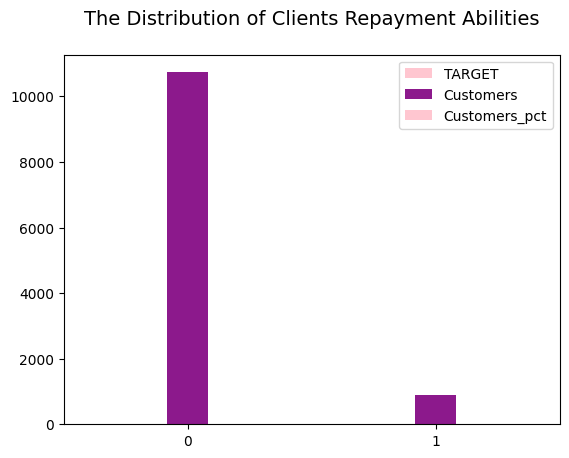

In [ ]:
plot = plt.figure(figsize = (12,7))
grp.plot(kind='bar', color= ['pink','purple'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.show()

# **Bivariate Categorical Features Vs Target**

In [ ]:
#Contract Type dan Target
ct = data_train.groupby(['TARGET', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
ct.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ct = list(ct['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in name_of_ct:
    data = ct[ct['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ct['Percent'] = percentage
ct



,TARGET,NAME_CONTRACT_TYPE,Customers,Percent
0,0,Cash loans,9644,0.92
2,1,Cash loans,843,0.08
1,0,Revolving loans,1089,0.95
3,1,Revolving loans,55,0.05


In [ ]:
#gender dan target
data_train['CODE_GENDER'] = data_train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [ ]:
gt = data_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
gt.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
gt.sort_values(by='Customers', ascending=False)


,CODE_GENDER,TARGET,Customers
0,Female,0,7134
2,Male,0,3599
1,Female,1,503
3,Male,1,395


In [ ]:
data_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,Male,0.098898
0,Female,0.065864


In [ ]:
#CarOwnershp dan target
data_train['FLAG_OWN_CAR'] = data_train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
cot = data_train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
cot.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
cot.sort_values(by='Customers', ascending=False)


,FLAG_OWN_CAR,TARGET,Customers
0,No,0,7124
2,Yes,0,3609
1,No,1,610
3,Yes,1,288


In [ ]:
data_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,No,0.078873
1,Yes,0.073903


In [ ]:
#Realty Ownership Staus and Target
data_train['FLAG_OWN_REALTY'] = data_train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
rot = data_train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
rot.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
rot.sort_values(by='Customers', ascending=False)

,FLAG_OWN_REALTY,TARGET,Customers
2,Yes,0,7504
0,No,0,3229
3,Yes,1,605
1,No,1,293


In [ ]:
data_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,No,0.083191
1,Yes,0.074608


<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

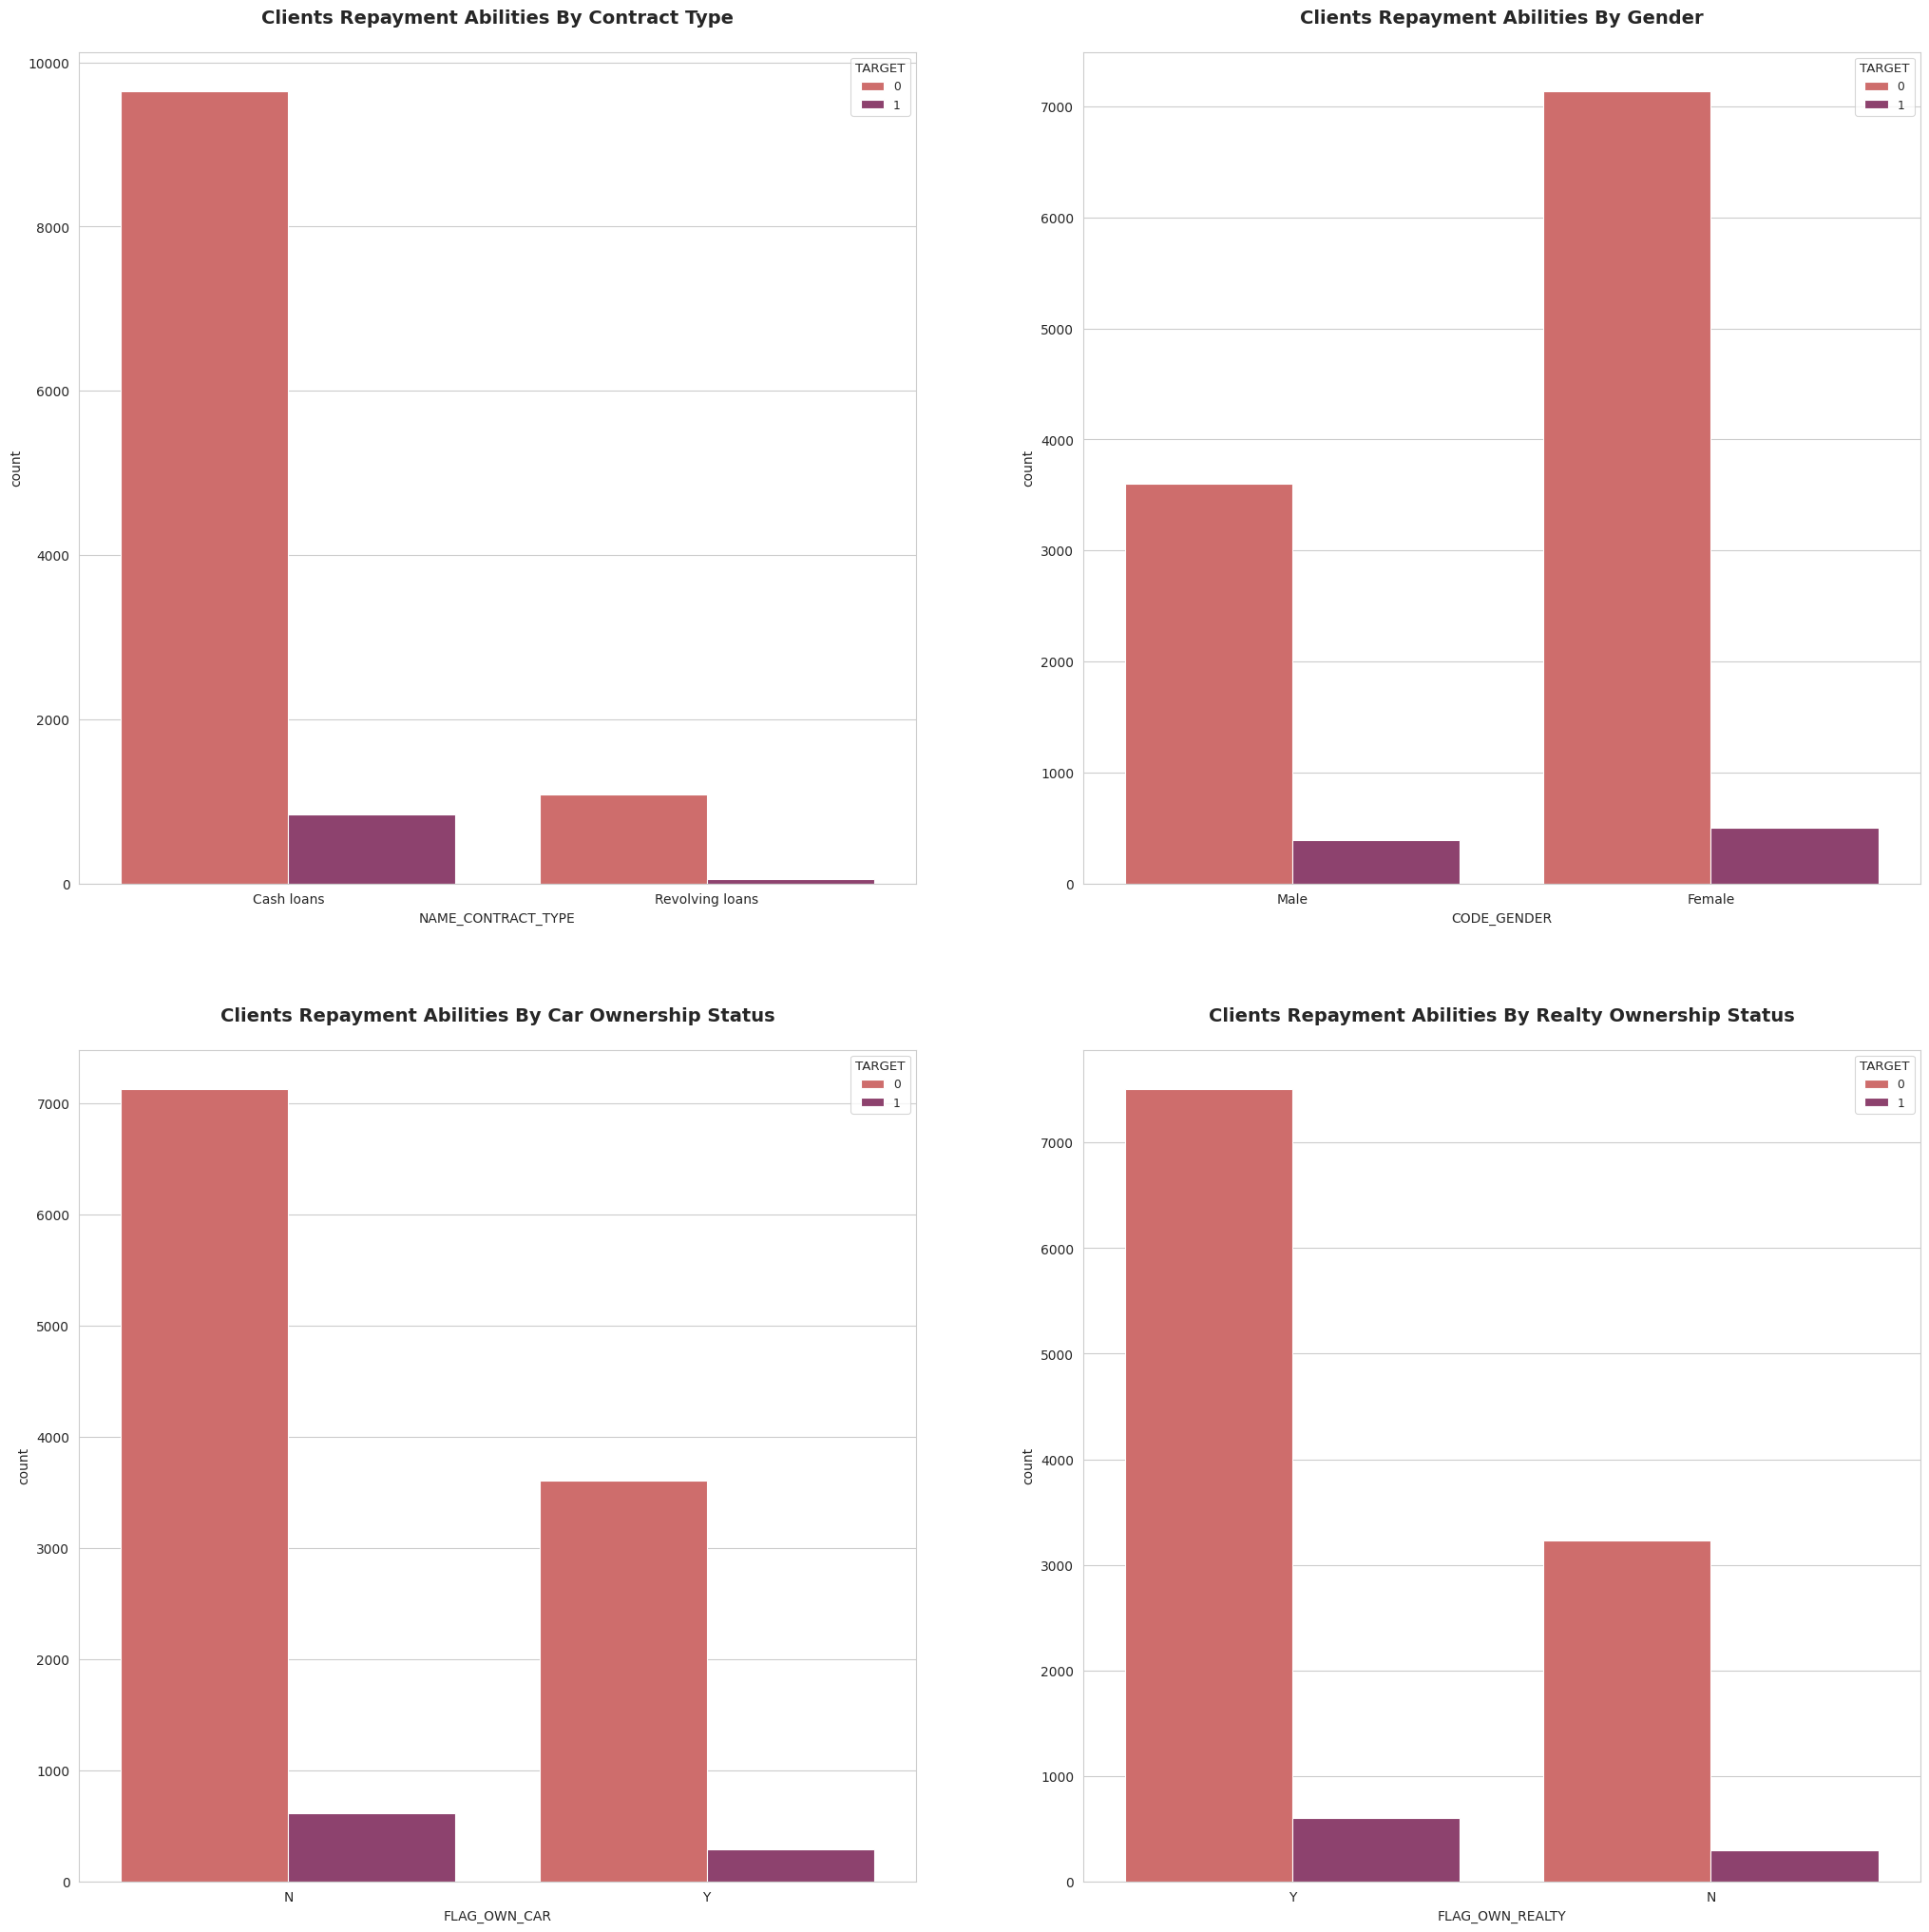

In [ ]:
# visualization
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[1][1])


# **Suite Type, Income Type, Education Type, and Family Status**

In [ ]:
#Suitetype dan target
st = data_train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
st.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
st.sort_values(by='Customers', ascending=False)

,NAME_TYPE_SUITE,TARGET,Customers
11,Unaccompanied,0,8677
2,Family,0,1424
12,Unaccompanied,1,744
9,"Spouse, partner",0,383
0,Children,0,119
3,Family,1,115
7,Other_B,0,54
10,"Spouse, partner",1,25
5,Other_A,0,23
4,Group of people,0,9


In [ ]:
data_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
6,Unaccompanied,0.078973
1,Family,0.074724
0,Children,0.062992
5,"Spouse, partner",0.061275
4,Other_B,0.052632
3,Other_A,0.041667
2,Group of people,0.000000


In [ ]:
#income Type and target
rt = data_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
rt.sort_values(by='Customers', ascending=False)

,NAME_INCOME_TYPE,TARGET,Customers
8,Working,0,5557
0,Commercial associate,0,2499
2,Pensioner,0,1937
4,State servant,0,737
9,Working,1,557
1,Commercial associate,1,191
3,Pensioner,1,111
5,State servant,1,39
7,Unemployed,0,2
6,Student,0,1


In [ ]:
data_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
5,Working,0.091102
0,Commercial associate,0.071004
1,Pensioner,0.054199
2,State servant,0.050258
3,Student,0.000000
4,Unemployed,0.000000


In [ ]:
#Education Type dan target
et = data_train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
et.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
et.sort_values(by='Customers', ascending=False)

,NAME_EDUCATION_TYPE,TARGET,Customers
8,Secondary / secondary special,0,7543
1,Higher education,0,2707
9,Secondary / secondary special,1,710
3,Incomplete higher,0,331
5,Lower secondary,0,142
2,Higher education,1,132
4,Incomplete higher,1,38
6,Lower secondary,1,18
0,Academic degree,0,9
7,Secondary / seco,0,1


In [ ]:
data_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.112500
2,Incomplete higher,0.102981
5,Secondary / secondary special,0.086029
1,Higher education,0.046495
0,Academic degree,0.000000
4,Secondary / seco,0.000000


In [ ]:
#Family Status vs target
fs = data_train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
fs.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
fs.sort_values(by='Customers', ascending=False)

,NAME_FAMILY_STATUS,TARGET,Customers
2,Married,0,7006
6,Single / not married,0,1536
0,Civil marriage,0,1001
4,Separated,0,628
8,Widow,0,561
3,Married,1,534
7,Single / not married,1,162
1,Civil marriage,1,105
5,Separated,1,62
9,Widow,1,35


In [ ]:
data_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
3,Single / not married,0.095406
0,Civil marriage,0.094937
2,Separated,0.089855
1,Married,0.070822
4,Widow,0.058725


In [ ]:
#Housing Type dan target
ht = data_train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ht.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
ht.sort_values(by='Customers', ascending=False)

,NAME_HOUSING_TYPE,TARGET,Customers
2,House / apartment,0,9505
3,House / apartment,1,759
10,With parents,0,506
4,Municipal apartment,0,408
8,Rented apartment,0,175
6,Office apartment,0,91
11,With parents,1,65
0,Co-op apartment,0,47
5,Municipal apartment,1,40
9,Rented apartment,1,24


In [ ]:
data_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.120603
5,With parents,0.113835
2,Municipal apartment,0.089286
0,Co-op apartment,0.078431
1,House / apartment,0.073948
3,Office apartment,0.061856


In [ ]:
data_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.120603
5,With parents,0.113835
2,Municipal apartment,0.089286
0,Co-op apartment,0.078431
1,House / apartment,0.073948
3,Office apartment,0.061856


In [ ]:
#Occupation type dan target
ot = data_train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ht.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
ht.sort_values(by='Customers', ascending=False)

,NAME_HOUSING_TYPE,TARGET,Customers
2,House / apartment,0,9505
3,House / apartment,1,759
10,With parents,0,506
4,Municipal apartment,0,408
8,Rented apartment,0,175
6,Office apartment,0,91
11,With parents,1,65
0,Co-op apartment,0,47
5,Municipal apartment,1,40
9,Rented apartment,1,24


In [ ]:
data_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.160000
17,Waiters/barmen staff,0.133333
4,Drivers,0.106322
1,Cleaning staff,0.105882
2,Cooking staff,0.102128
16,Security staff,0.092050
8,Laborers,0.089731
14,Sales staff,0.089014
12,Private service staff,0.081081
11,Medicine staff,0.078488


In [ ]:
#Process day dan target
pd = data_train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
pd.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
pd.sort_values(by='Customers', ascending=False)


,WEEKDAY_APPR_PROCESS_START,TARGET,Customers
10,TUESDAY,0,1867
2,MONDAY,0,1810
0,FRIDAY,0,1780
12,WEDNESDAY,0,1767
8,THURSDAY,0,1743
4,SATURDAY,0,1214
6,SUNDAY,0,551
9,THURSDAY,1,159
3,MONDAY,1,155
13,WEDNESDAY,1,155


In [ ]:
data_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
4,THURSDAY,0.083596
3,SUNDAY,0.083195
6,WEDNESDAY,0.080645
1,MONDAY,0.078880
2,SATURDAY,0.076104
0,FRIDAY,0.071950
5,TUESDAY,0.070219


In [ ]:
#Organization Type dan target
ot = data_train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ot.rename(columns = {'SK_ID_CURR' : 'Customers'}, inplace=True)
ot.sort_values(by='Customers', ascending=False)

,ORGANIZATION_TYPE,TARGET,Customers
10,Business Entity Type 3,0,2353
105,XNA,0,1939
78,Self-employed,0,1405
61,Other,0,597
56,Medicine,0,399
...,...,...,...
55,Legal Services,1,1
35,Industry: type 13,1,1
104,University,1,1
68,Realtor,1,1


In [ ]:
data_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
23,Industry: type 6,0.333333
18,Industry: type 13,0.250000
0,Advertising,0.200000
38,Restaurant,0.173077
14,Industry: type 1,0.170732
6,Cleaning,0.125000
45,Trade: type 1,0.125000
20,Industry: type 3,0.125000
40,Security,0.123810
13,Housing,0.112000


<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

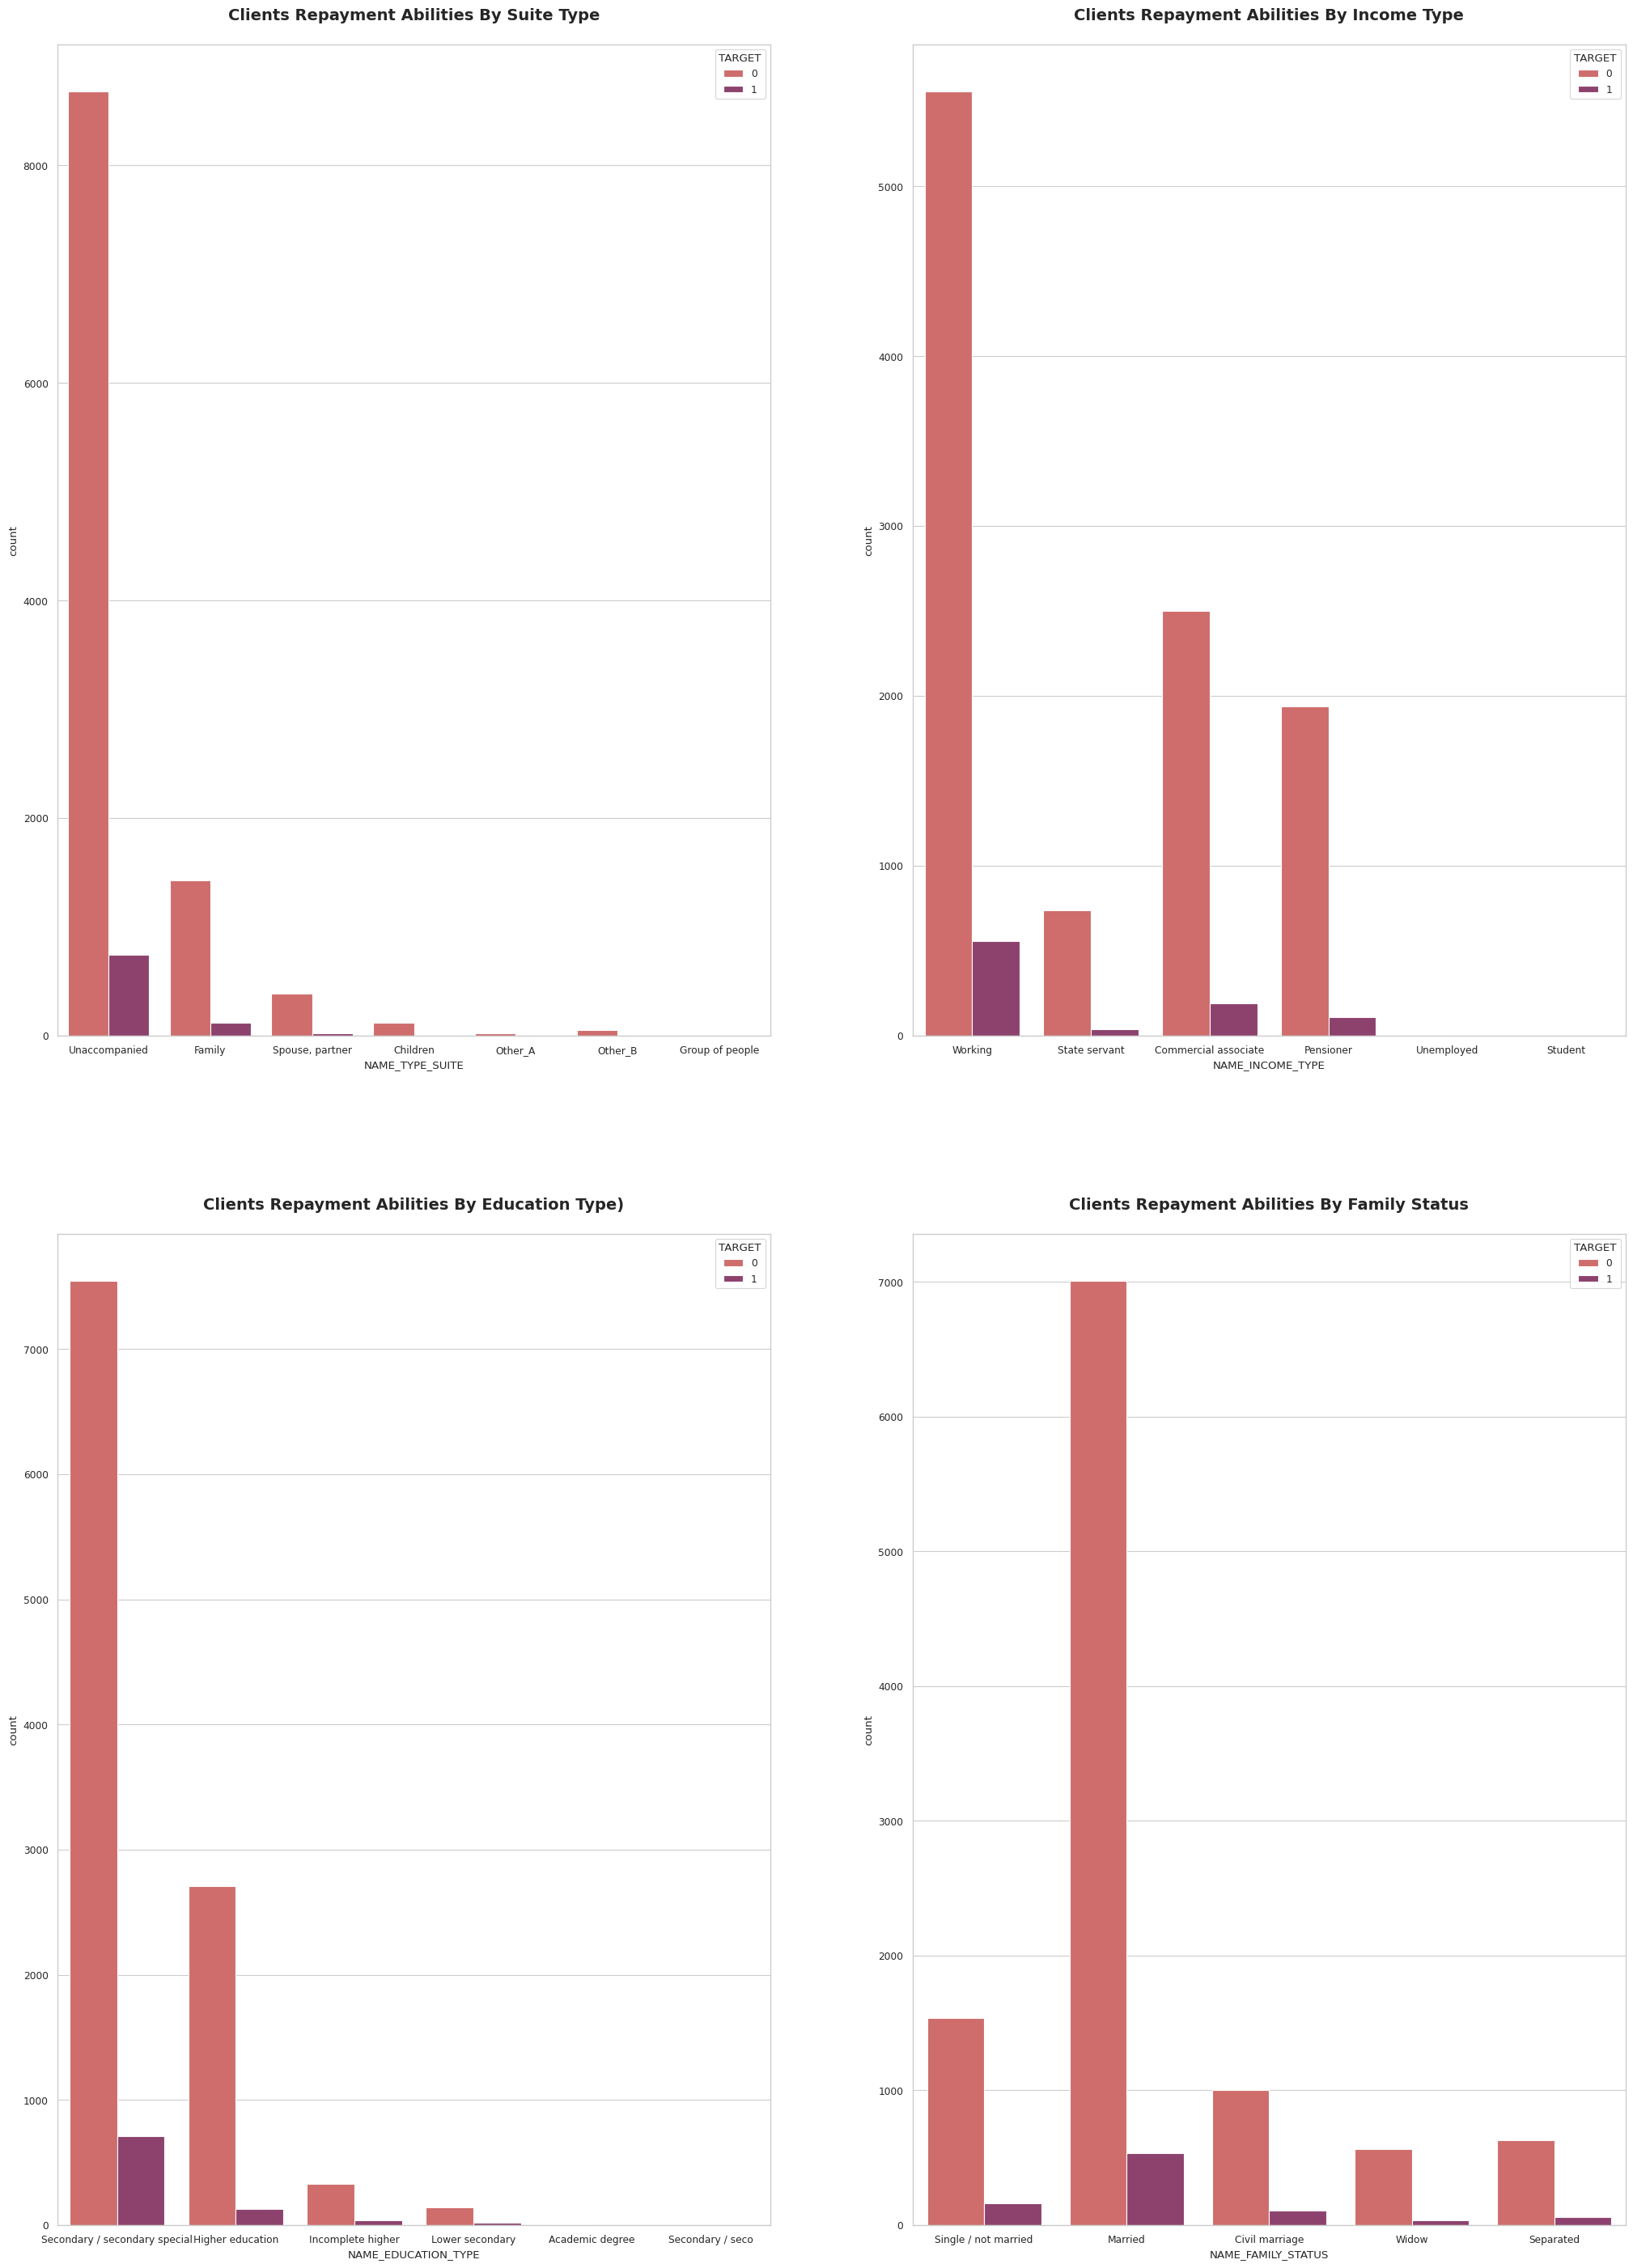

In [ ]:
# visualization Suite Type, Income Type, Education Type, and Family Status
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = data_train, hue = 'TARGET', palette = 'flare', ax=ax[1][1])

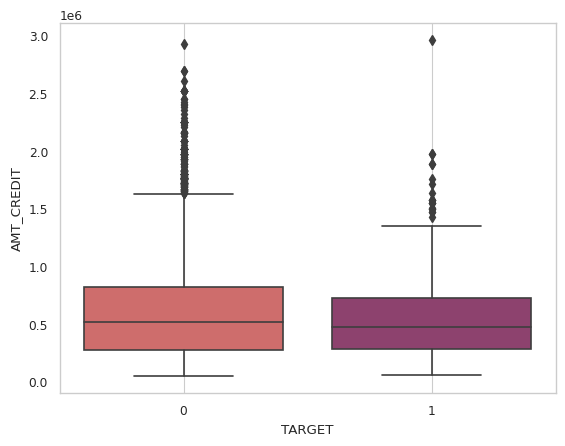

In [ ]:
#Amount Credit of the loan dan target
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data_train, palette = 'flare')
plt.grid()
plt.show()

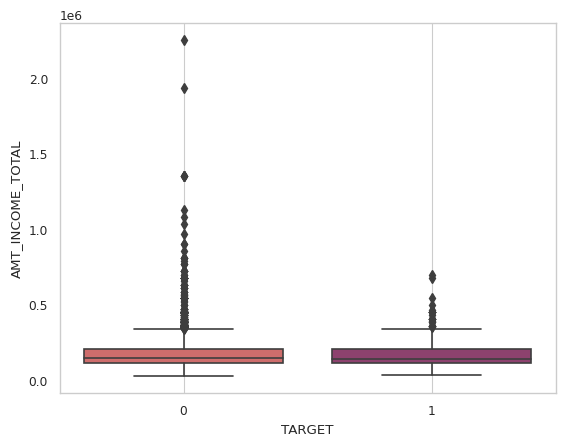

In [ ]:
#amount Income dan Target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=data_train, palette = 'flare' )
plt.grid()
plt.show()

# **Multivariant Visualization**

# **Group by Realty Ownership**

# 1. Income type, Amount of good price, Target, and House Ownership

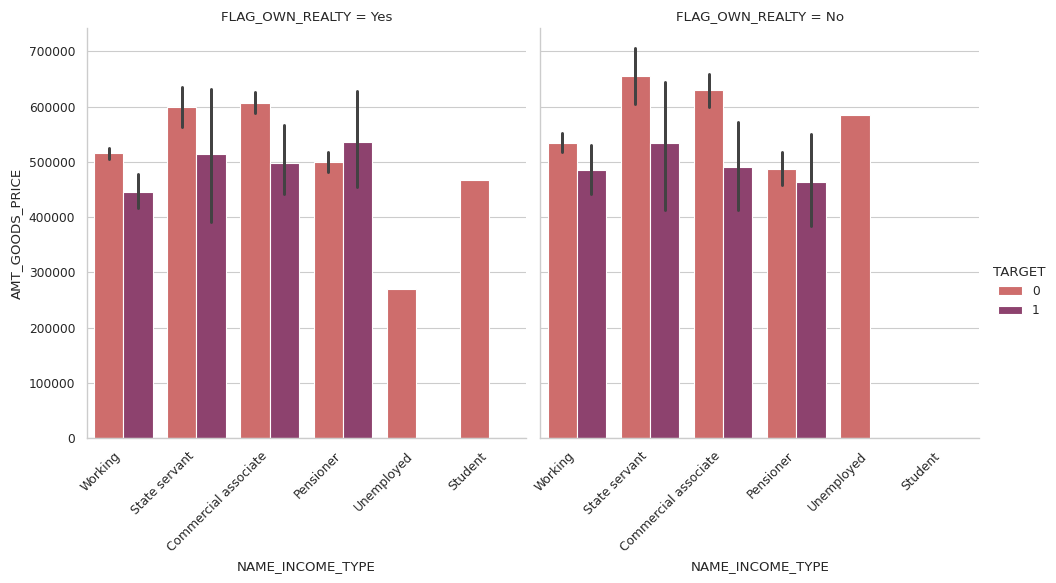

In [ ]:
graf = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'flare',
            data = data_train)

graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

# 2. Income type, amount of good price, target, adn house ownership status

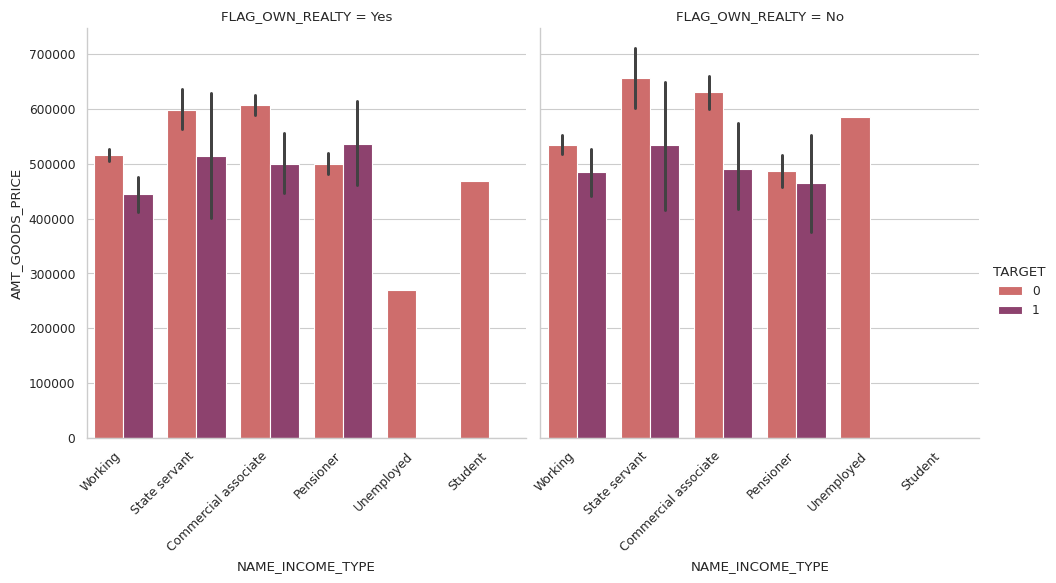

In [ ]:
graf = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'flare',
            data = data_train)

graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

# 3. Family status, amount of income, target, and house ownership status

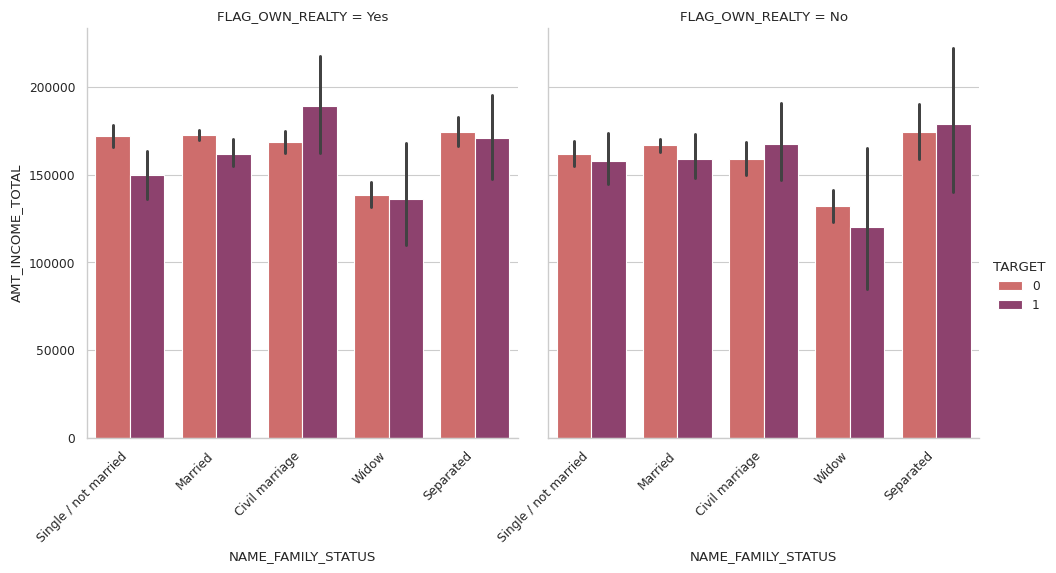

In [ ]:
graf = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'flare',
            data = data_train)

graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

# Grouped by Car Ownership Status

# 1. Contract type, the number of children, target, and car ownership status

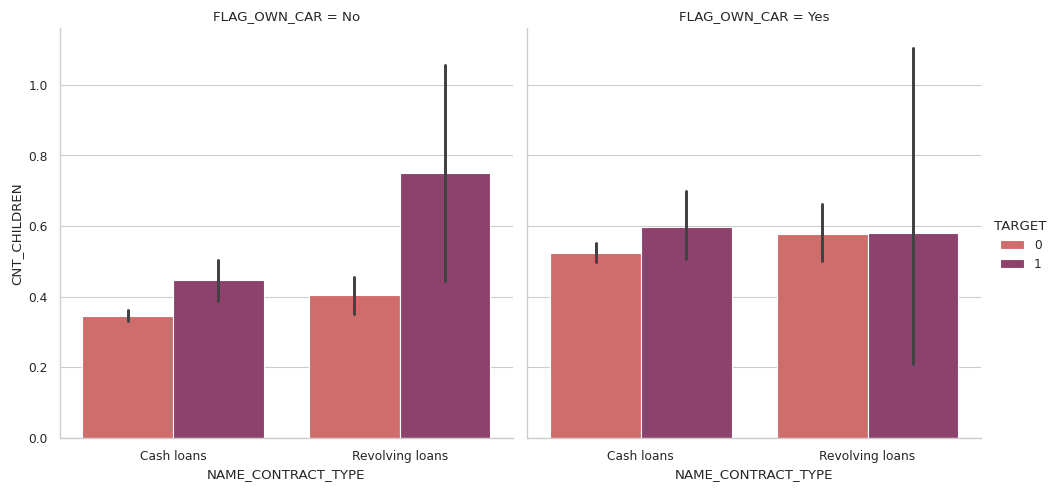

In [ ]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_CAR',
            kind = 'bar', palette = 'flare',
            data = data_train)
plt.show()

# Grouped by contract type

# 1. Income type, amount of credit, target, and contract *type*

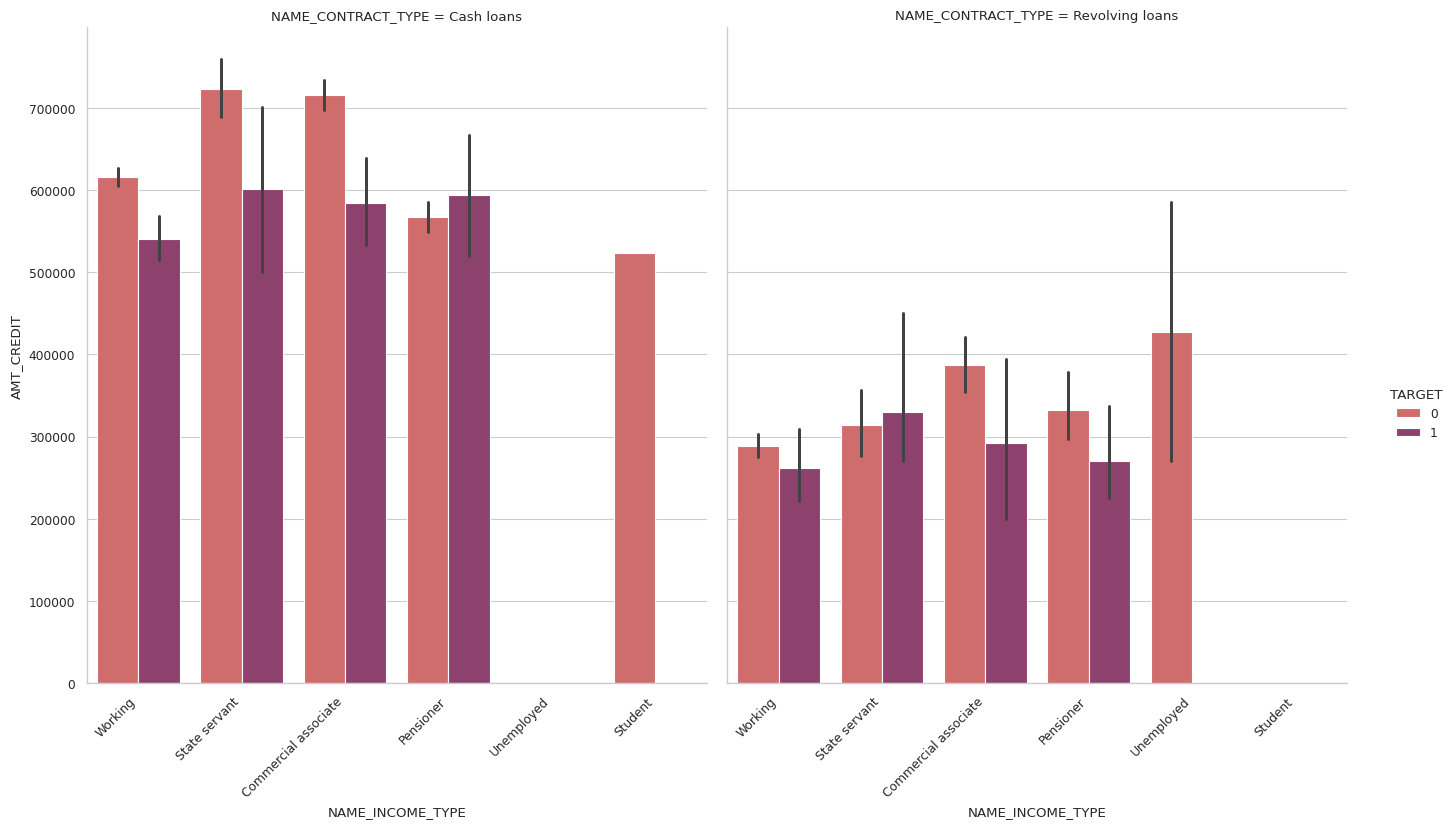

In [ ]:
graf = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'flare',
            data = data_train)

graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

# Grouped by rating of region where client lives

# 1. Housing type, amount credit of oan, target, and rating of region where client lives

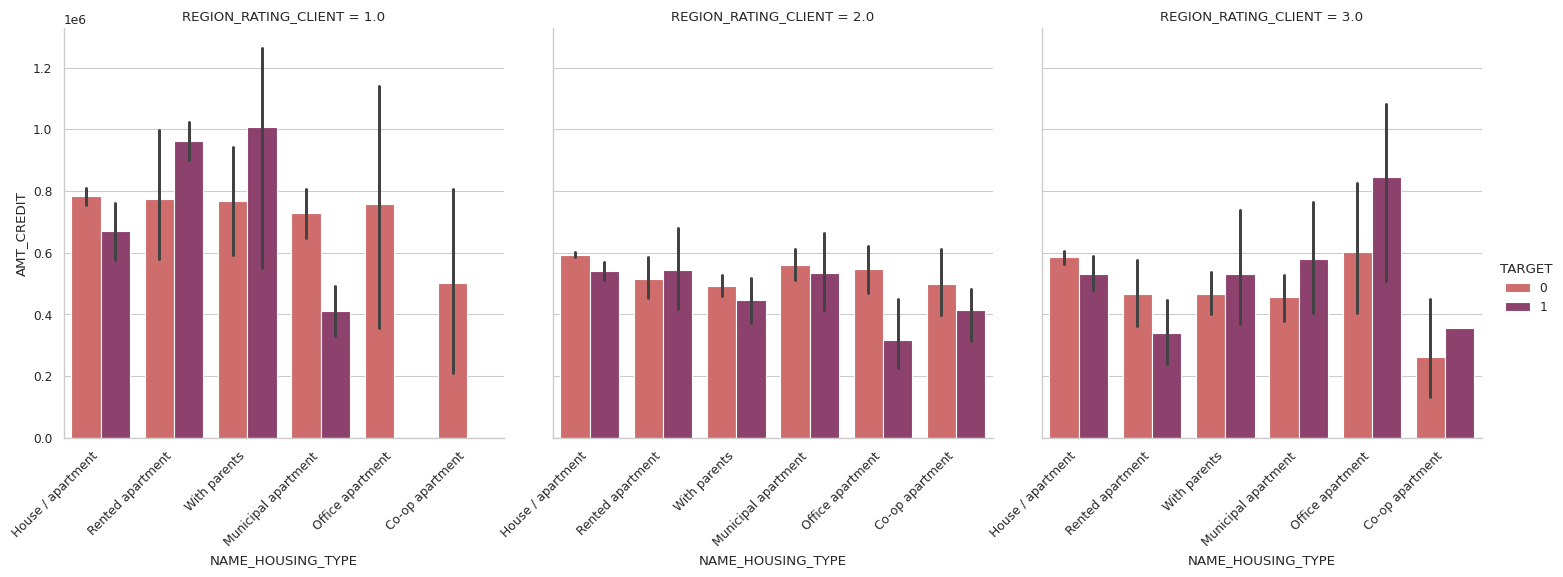

In [ ]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'flare',
            data = data_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

# 2. Education type, amount credit of loan, target, and rating of region where client lives

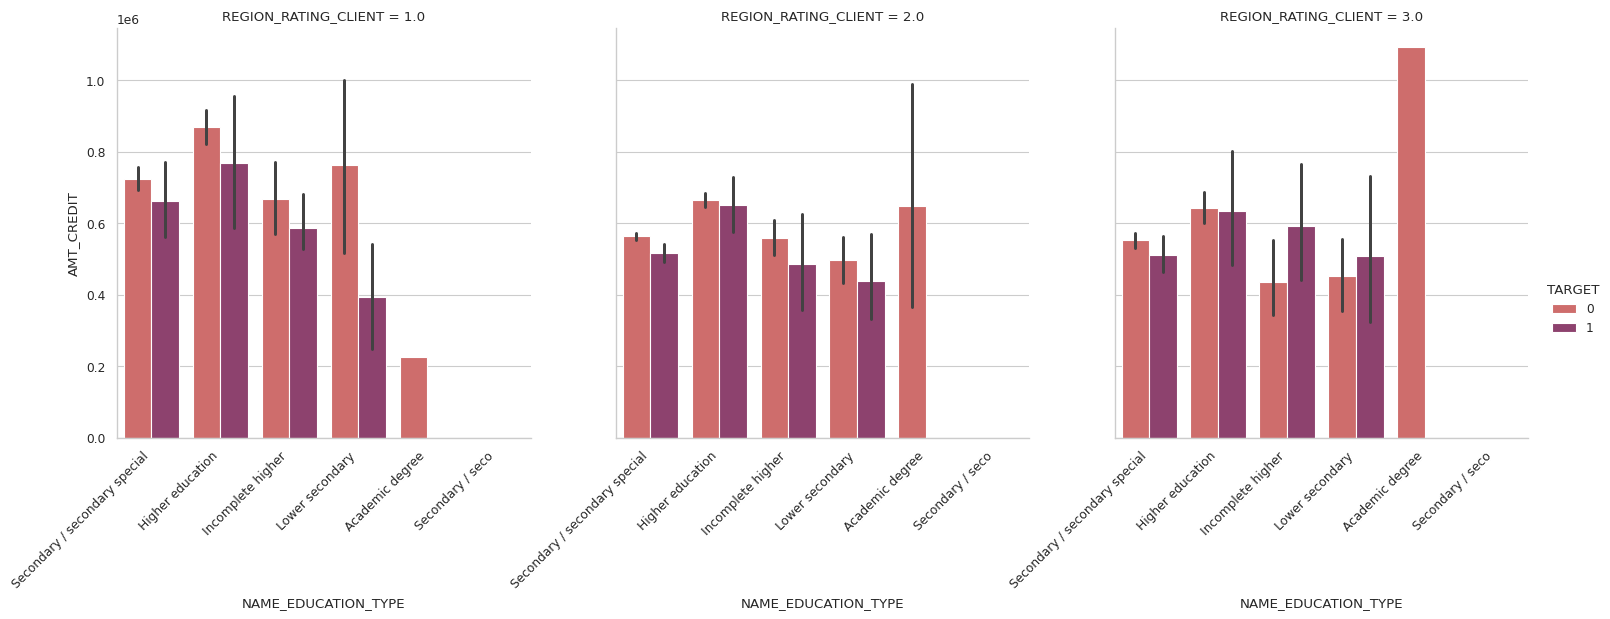

In [ ]:
graf = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'flare',
            data = data_train)

graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

# 3. Family status, amount credit of loan, target, and rating of region where client lives

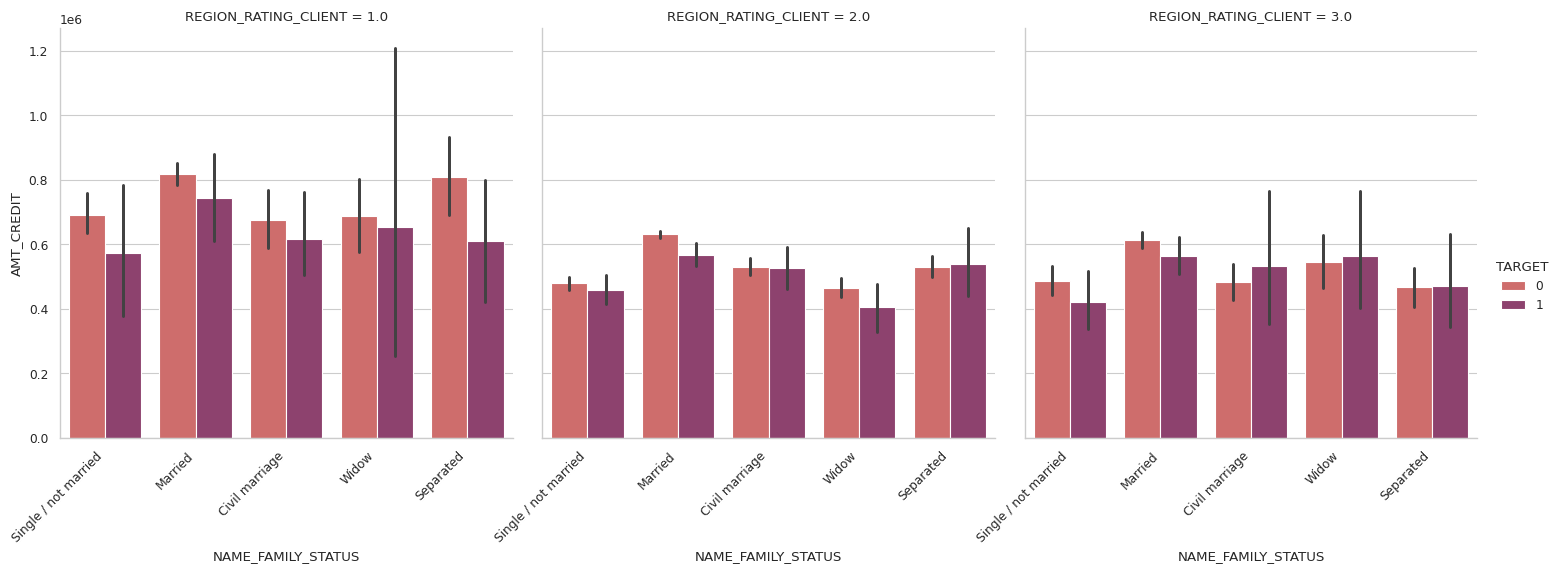

In [ ]:
graf = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'flare',
            data = data_train)
graf.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()